In [1]:
import fastText

In [2]:
import matplotlib.pyplot as plt

In [3]:
import findspark

In [4]:
findspark.init('/spark')

In [5]:
from operator import add

In [6]:
from pyspark import SparkContext, SparkConf

In [7]:
conf = SparkConf().setAppName("interests").setMaster("local")
sc = SparkContext(conf=conf)

In [8]:
model = fastText.load_model('model_combinednews.bin')

In [9]:
consumer_key = 'YOUR_CONSUMER_KEY'
consumer_secret = 'YOUR_CONSUMER_SECRET'
access_token = 'YOUR_ACCESS_TOKEN'
access_secret = 'YOUR_ACCESS_SECRET'

In [10]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [11]:
def findinterests(user, num = 100):
    tweets = api.user_timeline(screen_name = user, count = num, include_rts = True)
    predictions = []
    for tweet in tweets:
        tweet_text = ((tweet._json)['text']).replace('\n', ' ')
        prediction = model.predict([tweet_text])
        predicted_label = prediction[0][0][0]
        predictions.append(predicted_label)
    interests = sc.parallelize(predictions).map(lambda label: (label, 1)).reduceByKey(add).collect()
    return interests

In [12]:
def plotinterests(user, num = 100):
    results = findinterests(user, num)
    labels = [x[0] for x in results]
    fracs = [x[1] for x in results]
    plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

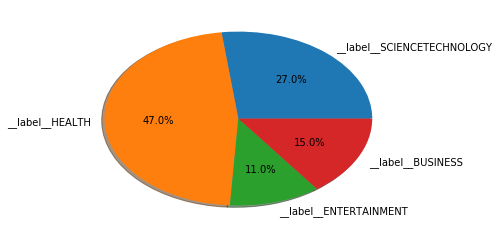

In [13]:
plotinterests('WHO')

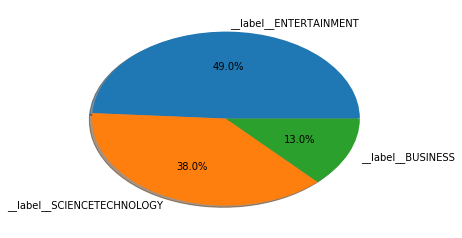

In [14]:
plotinterests('arminvanbuuren')

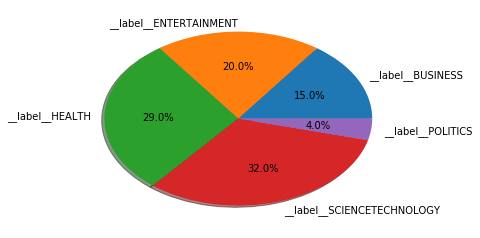

In [15]:
plotinterests('harvard')